In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# NEOM PROJECT

## Preprocessing

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [3]:
# import the data (chunksize returns jsonReader for iteration)
businesses = pd.read_json("/content/drive/My Drive/Neom comp/yelp_academic_dataset_business.json", lines=True, orient='columns', chunksize=1000000)
reviews = pd.read_json("/content/drive/My Drive/Neom comp/yelp_academic_dataset_review.json", lines=True, orient='columns', chunksize=1000000)

In [4]:
# read the data 
for business in businesses:
    subset_business = business
    break
    
for review in reviews:
    subset_review = review
    break

In [95]:
subset_review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


In [5]:
starsyelp_data = pd.merge(subset_business , subset_review)

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:1097: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


In [6]:
 yelp_data =  yelp_data.drop(['postal_code', 'state', 'is_open', 'useful', 'funny', 'cool', 'text', 'date' ,'hours', 'address'], axis=1)

In [7]:
yelp_data['user_id_code'] = yelp_data.business_id.astype('category').cat.codes
yelp_data['business_id_code'] = yelp_data.user_id.astype('category').cat.codes
yelp_data['review_id_code'] = yelp_data.review_id.astype('category').cat.codes

In [8]:
yelp_data.rename(columns={'user_id_code':'userId', 'business_id_code':'businessId',
                  'review_id_code':'reviewId'}, inplace=True)


In [9]:
 yelp_data =  yelp_data.drop(['business_id', 'review_id','user_id'], axis=1)

In [87]:
 yelp_data.head()

,name,city,latitude,longitude,stars,review_count,attributes,categories,userId,businessId,reviewId,ratings_per_business
0,"Carlos Santo, NMD",Scottsdale,33.569404,-111.890264,5.0,4,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",8427,72282,108223,2
1,"Carlos Santo, NMD",Scottsdale,33.569404,-111.890264,5.0,4,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",8427,66374,95876,1
2,"Carlos Santo, NMD",Scottsdale,33.569404,-111.890264,5.0,4,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",8427,43670,15518,1
3,"Carlos Santo, NMD",Scottsdale,33.569404,-111.890264,5.0,4,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",8427,15497,97582,1
4,Felinus,Montreal,45.479984,-73.580070,5.0,5,None,"Pets, Pet Services, Pet Groomers",8038,71675,50657,1


In [10]:
# average rating for each business
yelp_data.groupby('businessId')['stars'].mean()

businessId
0         4.333333
1         5.000000
2         4.000000
3         5.000000
4         5.000000
            ...   
104428    3.000000
104429    4.333333
104430    5.000000
104431    5.000000
104432    1.000000
Name: stars, Length: 104433, dtype: float64

In [11]:
# number of reviews per business
yelp_data.groupby('businessId')['userId'].count().sort_values(ascending=False).head(10)

businessId
22861    142
74320     66
42931     61
23429     60
64200     53
65923     53
67412     52
67894     46
75488     45
50685     45
Name: userId, dtype: int64

In [12]:
yelp_data['ratings_per_business'] = yelp_data.groupby('businessId')['userId'].transform('count')

In [13]:
total_users = yelp_data['userId'].nunique()
total_users

14988

In [14]:
ratings = pd.DataFrame(yelp_data.groupby('businessId')['stars'].mean())

In [15]:
ratings['rating_counts'] = pd.DataFrame(yelp_data.groupby('businessId')['stars'].count())
max_rating_counts = ratings['rating_counts'].max()
max_rating_counts

142

In [16]:
ratings.head(20)

,stars,rating_counts
businessId,,
0,4.333333,3
1,5.000000,1
2,4.000000,1
3,5.000000,1
4,5.000000,1
5,4.000000,1
6,4.000000,5
7,3.000000,1
8,3.000000,1


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

# add a new column 'total_visitors', and generate random values
for i, row in ratings.iterrows():
    ratings.loc[i, 'total_visitors'] = np.random.randint(row['rating_counts']*3, row['rating_counts']*40)
    

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


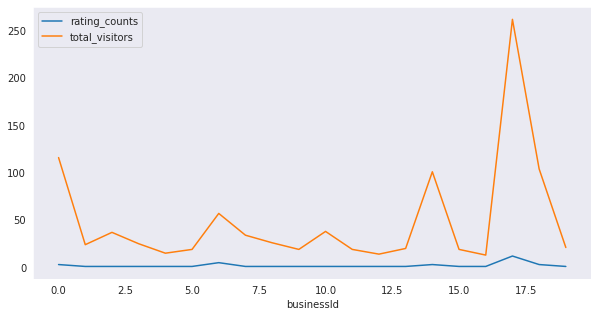

In [18]:
ratings[:20].plot(y=['rating_counts','total_visitors'], figsize=(10,5))

In [19]:
ratings['rating_percentage'] = ratings['rating_counts'] / ratings['total_visitors']
ratings.head(10)

,stars,rating_counts,total_visitors,rating_percentage
businessId,,,,
0,4.333333,3,116.0,0.025862
1,5.000000,1,24.0,0.041667
2,4.000000,1,37.0,0.027027
3,5.000000,1,25.0,0.040000
4,5.000000,1,15.0,0.066667
5,4.000000,1,19.0,0.052632
6,4.000000,5,57.0,0.087719
7,3.000000,1,34.0,0.029412
8,3.000000,1,26.0,0.038462


## NEURAL NETWORKS

In [20]:
#Split the data into train and test sets.
from sklearn.model_selection import train_test_split

X = yelp_data[['userId', 'businessId']].values
y = yelp_data['stars'].values

X_train_keras, X_test_keras, y_train_keras, y_test_keras = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_keras.shape, X_test_keras.shape, y_train_keras.shape, y_test_keras.shape


((116759, 2), (29190, 2), (116759,), (29190,))

In [21]:
n_factors = 10

X_train_array = [X_train_keras[:, 0], X_train_keras[:, 1]]
X_test_array = [X_test_keras[:, 0], X_test_keras[:, 1]]

In [22]:
from keras.layers import Add, Activation, Lambda
from keras.models import Model
from keras.layers import Input, Reshape, Dot
from keras.layers.embeddings import Embedding
from keras.optimizers import Adam
from keras.regularizers import l2

class EmbeddingLayer:
    def __init__(self, n_items, n_factors):
        self.n_items = n_items
        self.n_factors = n_factors
    
    def __call__(self, x):
        x = Embedding(self.n_items, self.n_factors, embeddings_initializer='he_normal', embeddings_regularizer=l2(1e-6))(x)
        x = Reshape((self.n_factors,))(x)
        
        return x
    
def Recommender(n_users, n_rests, n_factors, min_rating, max_rating):
    user = Input(shape=(1,))
    u = EmbeddingLayer(n_users, n_factors)(user)
    ub = EmbeddingLayer(n_users, 1)(user)
    
    restaurant = Input(shape=(1,))
    m = EmbeddingLayer(n_rests, n_factors)(restaurant)
    mb = EmbeddingLayer(n_rests, 1)(restaurant)   
    
    x = Dot(axes=1)([u, m])
    x = Add()([x, ub, mb])
    x = Activation('sigmoid')(x)
    x = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(x)  
    
    model = Model(inputs=[user, restaurant], outputs=x)
    opt = Adam(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=opt)  
    
    return model

In [23]:
n_users = yelp_data['userId'].nunique()
n_business = yelp_data['businessId'].nunique()
min_rating = min(yelp_data['stars'])
max_rating = max(yelp_data['stars'])

In [71]:
keras_model = Recommender(n_users, n_business , n_factors, min_rating, max_rating)
keras_model.summary()

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_16 (Embedding)        (None, 1, 10)        149880      input_9[0][0]                    
__________________________________________________________________________________________________
embedding_18 (Embedding)        (None, 1, 10)        1044330     input_10[0][0]                   
_______________________________________________________________________________________

In [72]:
# Let’s go ahead and train this for a few epochs and see what we get.
keras_model.fit(x=X_train_array, y=y_train_keras, batch_size=64,\
                          epochs=50, verbose=1, validation_data=(X_test_array, y_test_keras))

Epoch 1/50


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


1825/1825 [==============================] - 16s 9ms/step - loss: 1.5126 - val_loss: 1.2745
Epoch 2/50
1825/1825 [==============================] - 16s 9ms/step - loss: 1.0483 - val_loss: 0.9798
Epoch 3/50
1825/1825 [==============================] - 16s 9ms/step - loss: 0.7206 - val_loss: 0.8137
Epoch 4/50
1825/1825 [==============================] - 16s 9ms/step - loss: 0.5005 - val_loss: 0.7101
Epoch 5/50
1825/1825 [==============================] - 16s 9ms/step - loss: 0.3562 - val_loss: 0.6377
Epoch 6/50
1825/1825 [==============================] - 16s 9ms/step - loss: 0.2620 - val_loss: 0.5812
Epoch 7/50
1825/1825 [==============================] - 16s 9ms/step - loss: 0.2001 - val_loss: 0.5330
Epoch 8/50
1825/1825 [==============================] - 16s 9ms/step - loss: 0.1590 - val_loss: 0.4894
Epoch 9/50
1825/1825 [==============================] - 16s 9ms/step - loss: 0.1314 - val_loss: 0.4498
Epoch 10/50
1825/1825 [==============================] - 16s 9ms/step - loss: 0.1126

In [73]:
predictions = keras_model.predict(X_test_array)

In [74]:
#By creating the following table, we are able to see the model performance by comparing the actual stars and predictions.

# create the df_test table with prediction results
df_test = pd.DataFrame(X_test_keras[:,0])
df_test.rename(columns={0: "user"}, inplace=True)
df_test['business'] = X_test_keras[:,1]
df_test['stars'] = y_test_keras
df_test["predictions"] = predictions
df_test.head()

,user,business,stars,predictions
0,5034,60445,5.0,4.276744
1,2856,44981,4.0,4.025277
2,11141,80172,4.0,3.940877
3,14632,66265,4.0,3.988022
4,9342,42299,4.0,3.995541


### Evaluation

In [75]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 


In [76]:
y_test_keras.shape

(29190,)

In [77]:
 predictions.shape

(29190, 1)

In [78]:
y_test_keras.reshape((29190, ))

array([5., 4., 4., ..., 5., 4., 5.])

In [79]:
predictions.reshape((29190, ))

array([4.276744 , 4.025277 , 3.9408767, ..., 4.956312 , 3.9469254,
       4.8788743], dtype=float32)

In [80]:
mae = mean_absolute_error(y_test_keras,  predictions)

In [81]:
mae

0.16473612645669683

In [82]:
mse= mean_squared_error(y_test_keras ,  predictions) 

In [83]:
mse

0.11568541853417216

In [84]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [85]:
rmse_val = rmse(y_test_keras ,  predictions)


In [86]:
rmse_val

1.1374702342021146

## Pearson Correlation Coefficient 

In [91]:
 yelp_data.head(100)

,name,city,latitude,longitude,stars,review_count,attributes,categories,userId,businessId,reviewId,ratings_per_business
0,"Carlos Santo, NMD",Scottsdale,33.569404,-111.890264,5.0,4,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",8427,72282,108223,2
1,"Carlos Santo, NMD",Scottsdale,33.569404,-111.890264,5.0,4,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",8427,66374,95876,1
2,"Carlos Santo, NMD",Scottsdale,33.569404,-111.890264,5.0,4,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",8427,43670,15518,1
3,"Carlos Santo, NMD",Scottsdale,33.569404,-111.890264,5.0,4,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",8427,15497,97582,1
4,Felinus,Montreal,45.479984,-73.580070,5.0,5,None,"Pets, Pet Services, Pet Groomers",8038,71675,50657,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Annette Thomas Hair Colorist Specialist,Las Vegas,36.172534,-115.244762,5.0,7,"{'GoodForKids': 'True', 'BusinessParking': '{'...","Hair Stylists, Hair Salons, Beauty & Spas",1530,53867,60743,1
96,Théâtre Corona,Montréal,45.482777,-73.575006,4.0,18,"{'OutdoorSeating': 'False', 'RestaurantsPriceR...","Nightlife, Arts & Entertainment, Performing Ar...",945,74927,37119,2
97,Théâtre Corona,Montréal,45.482777,-73.575006,4.0,18,"{'OutdoorSeating': 'False', 'RestaurantsPriceR...","Nightlife, Arts & Entertainment, Performing Ar...",945,10176,64414,6
98,Théâtre Corona,Montréal,45.482777,-73.575006,4.0,18,"{'OutdoorSeating': 'False', 'RestaurantsPriceR...","Nightlife, Arts & Entertainment, Performing Ar...",945,12159,84597,18


In [99]:
businesses = pd.read_csv('/content/business.csv')
review = pd.read_csv('/content/user.csv')

In [101]:
businesses.head(2)


,businessId,businessName,category,isVegan,isSustainable,isFamilyFriendly
0,0,Konditori Ritorno,cafe,1,1,1
1,1,Bistrot du Peintre,cafe,1,1,0


In [103]:
review=review.drop(['Unnamed: 3'], axis=1)

In [104]:
review.head(2)

,userId,businessId,rating
0,0,0,4.5
1,0,1,4.0


In [105]:
userInput = [
{'businessName':'Algerian Coffee Stores', 'rating':1},
{'businessName':'Karam Beirut', 'rating':1},
{'businessName':'I stan', 'rating':1},
{'businessName':'Neom beach', 'rating':0.5},
{'businessName':'Neom exhbit for Saudi culture', 'rating':0}
]
inputData = pd.DataFrame(userInput)
inputData


,businessName,rating
0,Algerian Coffee Stores,1.0
1,Karam Beirut,1.0
2,I stan,1.0
3,Neom beach,0.5
4,Neom exhbit for Saudi culture,0.0


In [106]:
#Filtering out the movies by title
inputId = businesses[businesses['businessName'].isin(inputData ['businessName'].tolist())]
#Then merging it so we can get the movieId. It’s implicitly merging it by title.
inputData  = pd.merge(inputId, inputData )
#Dropping information we won’t use from the input dataframe
#inputMovies = inputMovies.drop(‘year’, 1)
#Final input dataframe
#If a movie you added in above isn’t here, then it might not be in the original
#dataframe or it might spelled differently, please check capitalisation.
inputData 

,businessId,businessName,category,isVegan,isSustainable,isFamilyFriendly,rating
0,3,Algerian Coffee Stores,cafe,0,1,1,1.0
1,8,Karam Beirut,restaurants,0,1,1,1.0
2,11,I stan,shop,1,1,1,1.0
3,22,Neom beach,beach,1,1,1,0.5
4,31,Neom exhbit for Saudi culture,cultural exhibit,1,1,1,0.0


In [107]:
inputId

,businessId,businessName,category,isVegan,isSustainable,isFamilyFriendly
3,3,Algerian Coffee Stores,cafe,0,1,1
8,8,Karam Beirut,restaurants,0,1,1
11,11,I stan,shop,1,1,1
22,22,Neom beach,beach,1,1,1
31,31,Neom exhbit for Saudi culture,cultural exhibit,1,1,1


In [108]:
#Filtering out users that have watched movies that the input has watched and storing it
userSubset = review[review['businessId'].isin(inputData ['businessId'].tolist())]
userSubset.head()

,userId,businessId,rating
8,0,11,3.5
11,1,8,3.5
16,1,31,5.0
18,1,3,4.0
33,3,22,5.0


In [109]:
#Groupby creates several sub dataframes where they all have the same value in the column specified as the parameter
userSubsetGroup = userSubset.groupby(['userId'])

In [110]:
#Sorting it so users with movie most in common with the input will have priority
userSubsetGroup = sorted(userSubsetGroup, key=lambda x: len(x[1]), reverse=True)

In [111]:
userSubsetGroup = userSubsetGroup[0:100]

In [113]:
from math import sqrt


In [114]:
#Store the Pearson Correlation in a dictionary, where the key is the user Id and the value is the coefficient
pearsonCorrelationDict = {}
#For every user group in our subset
for name, group in userSubsetGroup:
    #Let's start by sorting the input and current user group so the values aren't mixed up later on
    group = group.sort_values(by='businessId')
    inputData = inputData.sort_values(by='businessId')
    #Get the N for the formula
    nRatings = len(group)
    #Get the review scores for the movies that they both have in common
    temp_df = inputData[inputData['businessId'].isin(group['businessId'].tolist())]
    #And then store them in a temporary buffer variable in a list format to facilitate future calculations
    tempRatingList = temp_df['rating'].tolist()
    #Let's also put the current user group reviews in a list format
    tempGroupList = group['rating'].tolist()
    #Now let's calculate the pearson correlation between two users, so called, x and y
    Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(nRatings)
    Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(nRatings)
    Sxy = sum( i*j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(nRatings)
    
    #If the denominator is different than zero, then divide, else, 0 correlation.
    if Sxx != 0 and Syy != 0:
        pearsonCorrelationDict[name] = Sxy/sqrt(Sxx*Syy)
    else:
        pearsonCorrelationDict[name] = 0

In [115]:
pearsonCorrelationDict.items()

dict_items([(1, -0.9449111825230697), (18, -0.3273268353539889), (19, -0.8660254037844386), (33, -0.8660254037844355), (34, 0.49999999999999667), (36, -0.5000000000000018), (38, 0), (43, -0.9819805060619666), (3, 0), (6, -1.0), (7, 0), (9, -1.0), (10, -1.0), (12, 0), (13, 1.0), (14, -1.0), (15, -1.0), (21, 0), (27, 1.0), (28, -1.0), (30, 0), (31, -1.0), (40, 0), (0, 0), (4, 0), (8, 0), (11, 0), (17, 0), (20, 0), (22, 0), (23, 0), (26, 0), (29, 0), (32, 0), (35, 0), (37, 0), (42, 0)])

In [116]:
pearsonDF = pd.DataFrame.from_dict(pearsonCorrelationDict, orient='index')
pearsonDF.columns = ['similarityIndex']
pearsonDF['userId'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))
pearsonDF.head()

,similarityIndex,userId
0,-0.944911,1
1,-0.327327,18
2,-0.866025,19
3,-0.866025,33
4,0.500000,34


In [117]:
topUsers=pearsonDF.sort_values(by='similarityIndex', ascending=False)[0:50]
topUsers

,similarityIndex,userId
18,1.000000,27
14,1.000000,13
4,0.500000,34
28,0.000000,20
23,0.000000,0
24,0.000000,4
25,0.000000,8
26,0.000000,11
27,0.000000,17
29,0.000000,22


In [118]:
topUsersRating=topUsers.merge(review, left_on='userId', right_on='userId', how='inner')
topUsersRating.head()

,similarityIndex,userId,businessId,rating
0,1.0,27,0,4.0
1,1.0,27,0,4.0
2,1.0,27,6,4.5
3,1.0,27,11,5.0
4,1.0,27,39,4.0


In [119]:
#Multiplies the similarity by the user's ratings
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['rating']
topUsersRating.head(20)

,similarityIndex,userId,businessId,rating,weightedRating
0,1.0,27,0,4.0,4.0
1,1.0,27,0,4.0,4.0
2,1.0,27,6,4.5,4.5
3,1.0,27,11,5.0,5.0
4,1.0,27,39,4.0,4.0
5,1.0,27,15,5.0,5.0
6,1.0,27,17,5.0,5.0
7,1.0,27,37,5.0,5.0
8,1.0,27,22,4.0,4.0
9,1.0,27,26,4.0,4.0


In [120]:
#Applies a sum to the topUsers after grouping it up by userId
tempTopUsersRating = topUsersRating.groupby('businessId').sum()[['similarityIndex','weightedRating']]
tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedRating']
tempTopUsersRating.head()

,sum_similarityIndex,sum_weightedRating
businessId,,
0,1.000000,4.000000
1,-2.866025,-13.464102
2,-1.000000,-4.000000
3,-2.138263,-5.157339
4,0.000000,0.000000


In [121]:
#Creates an empty dataframe
recommendation_df = pd.DataFrame()
#Now we take the weighted average
recommendation_df['weighted average recommendation score'] = tempTopUsersRating['sum_weightedRating']/tempTopUsersRating['sum_similarityIndex']
recommendation_df['businessId'] = tempTopUsersRating.index
recommendation_df.head()

,weighted average recommendation score,businessId
businessId,,
0,4.000000,0
1,4.697831,1
2,4.000000,2
3,2.411929,3
4,NaN,4


In [122]:
recommendation_df = recommendation_df.sort_values(by='weighted average recommendation score', ascending=False)
recommendation_df.head(10)

,weighted average recommendation score,businessId
businessId,,
26,inf,26
6,20.660254,6
31,4.910992,31
25,4.789779,25
9,4.753394,9
1,4.697831,1
38,4.674374,38
10,4.587010,10
18,4.535898,18


In [123]:
recommendation_df=recommendation_df.replace([np.inf, -np.inf], np.nan)

In [124]:
recommendation_df=recommendation_df.dropna()

In [125]:
recommendation_df

,weighted average recommendation score,businessId
businessId,,
6,20.660254,6
31,4.910992,31
25,4.789779,25
9,4.753394,9
1,4.697831,1
38,4.674374,38
10,4.587010,10
18,4.535898,18
28,4.524176,28


In [127]:
recommendations = businesses[businesses['businessId'].isin(recommendation_df ['businessId'].tolist())]


In [128]:
recommendations.head(10)

,businessId,businessName,category,isVegan,isSustainable,isFamilyFriendly
0,0,Konditori Ritorno,cafe,1,1,1
1,1,Bistrot du Peintre,cafe,1,1,0
2,2,Caffe Gambrinus,cafe,1,0,0
3,3,Algerian Coffee Stores,cafe,0,1,1
5,5,Hong Restaurant,restaurants,1,1,0
6,6,Zafran Indian Bistro,restaurants,1,1,1
7,7,Najd Village,restaurants,1,0,1
8,8,Karam Beirut,restaurants,0,1,1
9,9,Outback Steakhouse,restaurant,0,0,0
10,10,fashion bridge,shop,1,1,1
